# Investigate a Dataset: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I analyzed a No-show Appointments data set. This data set consists of medical appointment information in Brazil that was collected in an effort to see whether or not patients showed up to their appointments. Here I explore how age, existence of medical conditions, and whether patients received a text reminder affected how often patients showed up for their appointments.

In [1]:
# Setting up environment here and reading data file

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Here I look at the data to see what I may need to clean up.

In [2]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

Column names are in Pascal Case. I am going to change that to Snake Case.

In [3]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

PatientId should be an integer, not a float.

ScheduledDay and AppointmentDay should be datetimes, not strings.

The last 7 columns can be represented as booleans instead of integers and strings.

In [4]:
df.shape

(110527, 14)

There are 110527 rows and 14 columns in this data set.

In [5]:
df.duplicated().sum()

0

There are no duplicate rows.

In [6]:
df.isnull().any().sum()

0

There are no null values in this data set.

### Data Cleaning
#### Create copy of df
Creating a copy of df to leave df unmutated

In [7]:
clean_df = df.copy()
clean_df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

#### Renaming Columns
Renaming the dataframe's columns to be Snake Case

In [8]:
clean_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
clean_df.columns = ['patient_id', 'appointment_id', 'gender',
              'scheduled_day','appointment_day', 'age', 
              'neighborhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
clean_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

#### Patient ID to integer
Converting Patient ID from float to integer

In [10]:
clean_df.patient_id = clean_df.patient_id.astype(int)
clean_df.head()

patient_id  appointment_id gender         scheduled_day  \
0   29872499824296         5642903      F  2016-04-29T18:38:08Z   
1  558997776694438         5642503      M  2016-04-29T16:08:27Z   
2    4262962299951         5642549      F  2016-04-29T16:19:04Z   
3     867951213174         5642828      F  2016-04-29T17:29:31Z   
4    8841186448183         5642494      F  2016-04-29T16:07:23Z   

        appointment_day  age       neighborhood  scholarship  hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handicap  sms_received no_show  
0         0           0         0             0      No  
1         0           0         0             0      No  
2         0           0         0             0      No  
3         0           0         0             0      No  
4         1           0         0             0      No

#### Scheduled Day and Appointment Day 
Converting scheduled day and appointment day to datetime

In [11]:
clean_df.scheduled_day = clean_df.scheduled_day.astype('datetime64[ns]')
clean_df.scheduled_day = clean_df.scheduled_day.dt.normalize()
clean_df.appointment_day = clean_df.appointment_day.astype('datetime64[ns]')
clean_df.appointment_day = clean_df.appointment_day.dt.normalize()
clean_df.head()

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0   29872499824296         5642903      F    2016-04-29      2016-04-29   62   
1  558997776694438         5642503      M    2016-04-29      2016-04-29   56   
2    4262962299951         5642549      F    2016-04-29      2016-04-29   62   
3     867951213174         5642828      F    2016-04-29      2016-04-29    8   
4    8841186448183         5642494      F    2016-04-29      2016-04-29   56   

        neighborhood  scholarship  hypertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handicap  sms_received no_show  
0         0             0      No  
1         0             0      No  
2         0             0      No  
3         0             0      No  
4         0             0      No

#### No Show to Boolean
Converted No Show column to a boolean

In [12]:
clean_df.no_show = (clean_df.no_show == 'Yes').astype(bool)
clean_df.head()

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0   29872499824296         5642903      F    2016-04-29      2016-04-29   62   
1  558997776694438         5642503      M    2016-04-29      2016-04-29   56   
2    4262962299951         5642549      F    2016-04-29      2016-04-29   62   
3     867951213174         5642828      F    2016-04-29      2016-04-29    8   
4    8841186448183         5642494      F    2016-04-29      2016-04-29   56   

        neighborhood  scholarship  hypertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handicap  sms_received  no_show  
0         0             0    False  
1         0             0    False  
2         0             0    False  
3         0             0    False  
4         0             0    False

#### Scholarship through SMS Received to boolean
Converted all values that can be interpreted as yes or no to booleans

In [13]:
clean_df.iloc[:,7:-1] = clean_df.iloc[:,7:-1].astype(bool)
clean_df.head()

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0   29872499824296         5642903      F    2016-04-29      2016-04-29   62   
1  558997776694438         5642503      M    2016-04-29      2016-04-29   56   
2    4262962299951         5642549      F    2016-04-29      2016-04-29   62   
3     867951213174         5642828      F    2016-04-29      2016-04-29    8   
4    8841186448183         5642494      F    2016-04-29      2016-04-29   56   

        neighborhood  scholarship  hypertension  diabetes  alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   handicap  sms_received  no_show  
0     False         False    False  
1     False         False    False  
2     False         False    False  
3     False         False    False  
4     False         False    False

<a id='eda'></a>
## Exploratory Data Analysis

### Are older patients more or less likely to not show?

In [14]:
clean_df[clean_df.age >= 100]

patient_id  appointment_id gender scheduled_day appointment_day  \
58014   976294799775439         5651757      F    2016-05-03      2016-05-03   
63912    31963211613981         5700278      F    2016-05-16      2016-05-19   
63915    31963211613981         5700279      F    2016-05-16      2016-05-19   
68127    31963211613981         5562812      F    2016-04-08      2016-05-16   
76284    31963211613981         5744037      F    2016-05-30      2016-05-30   
79270     9739429797896         5747809      M    2016-05-30      2016-05-31   
79272     9739429797896         5747808      M    2016-05-30      2016-05-31   
90372      234283596548         5751563      F    2016-05-31      2016-06-02   
92084    55783129426615         5670914      F    2016-05-06      2016-06-03   
97666   748234579244724         5717451      F    2016-05-19      2016-06-03   
108506     393964189799         5721152      F    2016-05-19      2016-06-01   

        age     neighborhood  scholarship  hypertension  diabetes  alcoholism  \
58014   102        CONQUISTA        False         False     False       False   
63912   115       ANDORINHAS        False         False     False       False   
63915   115       ANDORINHAS        False         False     False       False   
68127   115       ANDORINHAS        False         False     False       False   
76284   115       ANDORINHAS        False         False     False       False   
79270   100       TABUAZEIRO        False         False     False       False   
79272   100       TABUAZEIRO        False         False     False       False   
90372   102      MARIA ORTIZ        False         False     False       False   
92084   100  ANTÔNIO HONÓRIO        False         False     False       False   
97666   115         SÃO JOSÉ        False          True     False       False   
108506  100          MARUÍPE        False         False     False       False   

        handicap  sms_received  no_show  
58014      False         False    False  
63912       True         False     True  
63915       True         False     True  
68127       True         False     True  
76284       True         False    False  
79270       True         False    False  
79272       True         False    False  
90372      False         False    False  
92084      False          True    False  
97666      False          True    False  
108506     False         False    False

Excluding people ages 100+ because there aren't that many of them.

In the next cell, I group patients into decade age groups and plot the percentage of people that did not show up to their appointment.

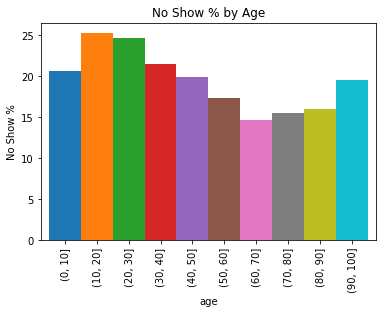

In [15]:
age_bins = np.arange(0, 101, 10)

def percentage(series):
    return series.sum() / series.count() * 100

df_age = clean_df.copy()

grouped = df_age['no_show'].groupby(pd.cut(df_age.age, age_bins)).agg(percentage)
plot = grouped.plot.bar(title='No Show % by Age', width=1.0)
plot.set_ylabel('No Show %');

Generally, it seems like percentage of no shows decreases as people age. It is interesting that the no show percentage from 0-10 is lower than 10-20. It is also interesting that the no show percentage from 90-100 is higher than 80-90.

Next, I wanted to see if whether a pation had some sort of condition affected no show percentages.

First, I added a new column to the data set called 'has_condition' which was true if they had any of the following: hypertension, diabetes, alcoholism, handicap.

In [16]:
df_age['has_condition'] = df_age.apply(lambda row: row.hypertension or row.diabetes or row.alcoholism or row.handicap, axis=1)
df_age.head()

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0   29872499824296         5642903      F    2016-04-29      2016-04-29   62   
1  558997776694438         5642503      M    2016-04-29      2016-04-29   56   
2    4262962299951         5642549      F    2016-04-29      2016-04-29   62   
3     867951213174         5642828      F    2016-04-29      2016-04-29    8   
4    8841186448183         5642494      F    2016-04-29      2016-04-29   56   

        neighborhood  scholarship  hypertension  diabetes  alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   handicap  sms_received  no_show  has_condition  
0     False         False    False           True  
1     False         False    False          False  
2     False         False    False          False  
3     False         False    False          False  
4     False         False    False           True

Then I grouped the data by age and existence of a condition and plot it.

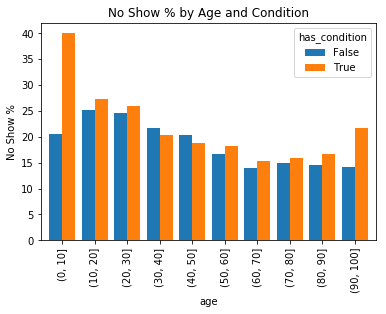

In [17]:
grouped_condition = df_age.groupby([pd.cut(df_age.age, age_bins), 'has_condition']).no_show.agg(percentage)
grouped_condition = grouped_condition.unstack()
condition_plot = grouped_condition.plot.bar(title='No Show % by Age and Condition', width=0.8)
condition_plot.set_ylabel('No Show %');

### Were people that received an SMS more or less likely to show?

I expected that people who received an SMS reminder to show up to their appointment would be less likely to miss their appointment.

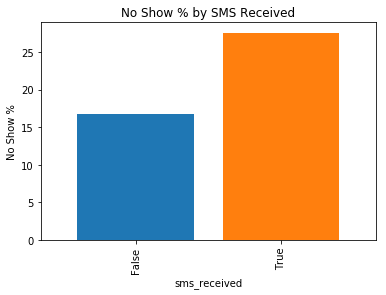

In [18]:
df_sms = clean_df.copy()

no_show_sms = df_sms.groupby('sms_received').no_show.agg(percentage)
sms_plot = no_show_sms.plot.bar(title='No Show % by SMS Received', width=0.8)
sms_plot.set_ylabel('No Show %');

<a id='conclusions'></a>
## Conclusions

In the first plot, I expected older people to no show less than younger people. This was generally the case. The exceptions were the 0-10 and 90-100 age groups.

In the second plot, I expected people with conditions to no show less than people without conditions. That doesn't seem to be the case. The percentage of no shows is pretty close in each age group other than the 0-10 and 90-100 age groups.

In the third plot, I expected people who received an SMS appointment reminder to no show less than those who had not received an SMS. This was not the case.

No statistical tests were done in this investigation and no statistical conclusions can be drawn.